In [1]:
# Install Packages
# ! pip install -U numpy
# ! pip install pyarrow
# ! pip install missingno


In [2]:
# Do all imports and installs here
# Read in the data here ( parquet files)
# https://arrow.apache.org/docs/python/pandas.html
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import missingno as msno
pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)


## Functions

In [3]:
def print_info(df):
    print ("\n\n---------------------")
    print ("Dataset INFORMATION")
    print ("---------------------")
    print ("Shape of data set:", df.shape, "\n")
    print ("Column Headers:", list(df.columns.values), "\n")
    print (df.dtypes)
    
def print_detailed_report(df):
    import re
    missing_values = []
    nonumeric_values = []

    print ("Dataset INFORMATION")
    print ("========================\n")

    for column in df:
        # Find all the unique feature values
        uniq = df[column].unique()
        print ("'{}' has {} unique values" .format(column,uniq.size))
        if (uniq.size > 10):
            print("~~Listing up to 10 unique values~~")
        print (uniq[0:10])
        print ("\n-----------------------------------------------------------------------\n")

        # Find features with missing values
        if (True in pd.isnull(uniq)):
            s = "{} has {} missing" .format(column, pd.isnull(df[column]).sum())
            missing_values.append(s)

        # Find features with non-numeric values
        for i in range (1, np.prod(uniq.shape)):
            if (re.match('nan', str(uniq[i]))):
                break
            if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
                nonumeric_values.append(column)
                break

    print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print ("Features with missing values:\n{}\n\n" .format(missing_values))
    print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
    print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")


### Import Immigration Data

In [4]:
folder = 'sas_data'
df = pq.ParquetDataset(folder).read_pandas().to_pandas(split_blocks=True, self_destruct=True)

#### Data Dictionary
* cicid - float64 - ID that uniquely identify one record in the dataset
* i94yr - float64 - 4 digit year
* i94mon- float64 - Numeric month
* i94cit - float64 - 3 digit code of source city for immigration (Born country)
* i94res - float64 - 3 digit code of source country for immigration (Residence country)
* i94port - object - Port addmitted through
* arrdate - float64 - Arrival date in the USA
* i94mode - float64 - Mode of transportation (1 = Air; 2 = Sea; 3 = Land; 9 = Not reported)
* i94addr - object - State of arrival
* depdate  -float64 - Departure date
* i94bir - float64 - Age of Respondent in Years
* i94visa - float64 - Visa codes collapsed into three categories: (1 = Business; 2 = Pleasure; 3 = Student)
* count - float64 - Used for summary statistics
* dtadfile - object - Character Date Field
* visapost - object - Department of State where where Visa was issued
* occup - object - Occupation that will be performed in U.S.
* entdepa - object - Arrival Flag. Whether admitted or paroled into the US
* entdepd - object - Departure Flag. Whether departed, lost visa, or deceased
* entdepu - object - Update Flag. Update of visa, either apprehended, overstayed, or updated to PR
* matflag - object - Match flag
* biryear - float64 - 4 digit year of birth
* dtaddto - object - Character date field to when admitted in the US
* gender  - object - Gender
* insnum  -  object - INS number
* airline -    object - Airline used to arrive in U.S.
* admnum -     float64 - Admission number, should be unique and not nullable
* fltno   -     object - Flight number of Airline used to arrive in U.S.
* visatype  -  object - Class of admission legally admitting the non-immigrant to temporarily stay in U.S.

## Step 2: Explore and Assess the Data
Explore the Data
Identify data quality issues, like missing values, duplicate data, etc.

In [5]:
print_info(df)



---------------------
Value INFORMATION
---------------------
Shape of data set: (3096313, 28) 

Column Headers: ['cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port', 'arrdate', 'i94mode', 'i94addr', 'depdate', 'i94bir', 'i94visa', 'count', 'dtadfile', 'visapost', 'occup', 'entdepa', 'entdepd', 'entdepu', 'matflag', 'biryear', 'dtaddto', 'gender', 'insnum', 'airline', 'admnum', 'fltno', 'visatype'] 

cicid       float64
i94yr       float64
i94mon      float64
i94cit      float64
i94res      float64
i94port      object
arrdate     float64
i94mode     float64
i94addr      object
depdate     float64
i94bir      float64
i94visa     float64
count       float64
dtadfile     object
visapost     object
occup        object
entdepa      object
entdepd      object
entdepu      object
matflag      object
biryear     float64
dtaddto      object
gender       object
insnum       object
airline      object
admnum      float64
fltno        object
visatype     object
dtype: object


In [8]:
df.describe()

,cicid,i94yr,i94mon,i94cit,i94res,arrdate,i94mode,depdate,i94bir,i94visa,count,biryear,admnum
count,3.096313e+06,3096313.0,3096313.0,3.096313e+06,3.096313e+06,3.096313e+06,3.096074e+06,2.953856e+06,3.095511e+06,3.096313e+06,3096313.0,3.095511e+06,3.096313e+06
mean,3.078652e+06,2016.0,4.0,3.049069e+02,3.032838e+02,2.055985e+04,1.073690e+00,2.057395e+04,4.176761e+01,1.845393e+00,1.0,1.974232e+03,7.082885e+10
std,1.763278e+06,0.0,0.0,2.100269e+02,2.085832e+02,8.777339e+00,5.158963e-01,2.935697e+01,1.742026e+01,3.983910e-01,0.0,1.742026e+01,2.215442e+10
min,6.000000e+00,2016.0,4.0,1.010000e+02,1.010000e+02,2.054500e+04,1.000000e+00,1.517600e+04,-3.000000e+00,1.000000e+00,1.0,1.902000e+03,0.000000e+00
25%,1.577790e+06,2016.0,4.0,1.350000e+02,1.310000e+02,2.055200e+04,1.000000e+00,2.056100e+04,3.000000e+01,2.000000e+00,1.0,1.962000e+03,5.603523e+10
50%,3.103507e+06,2016.0,4.0,2.130000e+02,2.130000e+02,2.056000e+04,1.000000e+00,2.057000e+04,4.100000e+01,2.000000e+00,1.0,1.975000e+03,5.936094e+10
75%,4.654341e+06,2016.0,4.0,5.120000e+02,5.040000e+02,2.056700e+04,1.000000e+00,2.057900e+04,5.400000e+01,2.000000e+00,1.0,1.986000e+03,9.350987e+10
max,6.102785e+06,2016.0,4.0,9.990000e+02,7.600000e+02,2.057400e+04,9.000000e+00,4.542700e+04,1.140000e+02,3.000000e+00,1.0,2.019000e+03,9.991557e+10


In [7]:
print_detailed_report(df)

Dataset INFORMATION

'cicid' has 3096313 unique values
~~Listing up to 10 unique values~~
[ 6.  7. 15. 16. 17. 18. 19. 20. 21. 22.]

-----------------------------------------------------------------------

'i94yr' has 1 unique values
[2016.]

-----------------------------------------------------------------------

'i94mon' has 1 unique values
[4.]

-----------------------------------------------------------------------

'i94cit' has 243 unique values
~~Listing up to 10 unique values~~
[692. 254. 101. 102. 103. 104. 105. 107. 108. 109.]

-----------------------------------------------------------------------

'i94res' has 229 unique values
~~Listing up to 10 unique values~~
[692. 276. 101. 110. 117. 112. 251. 102. 103. 104.]

-----------------------------------------------------------------------

'i94port' has 299 unique values
~~Listing up to 10 unique values~~
['XXX' 'ATL' 'WAS' 'NYC' 'TOR' 'BOS' 'HOU' 'MIA' 'CHI' 'LOS']

--------------------------------------------------------------

### Missing Values Percentage

In [9]:
(df.isnull().sum() / len(df))*100

cicid        0.000000
i94yr        0.000000
i94mon       0.000000
i94cit       0.000000
i94res       0.000000
i94port      0.000000
arrdate      0.000000
i94mode      0.007719
i94addr      4.928184
depdate      4.600859
i94bir       0.025902
i94visa      0.000000
count        0.000000
dtadfile     0.000032
visapost    60.757746
occup       99.737559
entdepa      0.007687
entdepd      4.470769
entdepu     99.987340
matflag      4.470769
biryear      0.025902
dtaddto      0.015405
gender      13.379429
insnum      96.327632
airline      2.700857
admnum       0.000000
fltno        0.631364
visatype     0.000000
dtype: float64

### Matrix of Missing Values

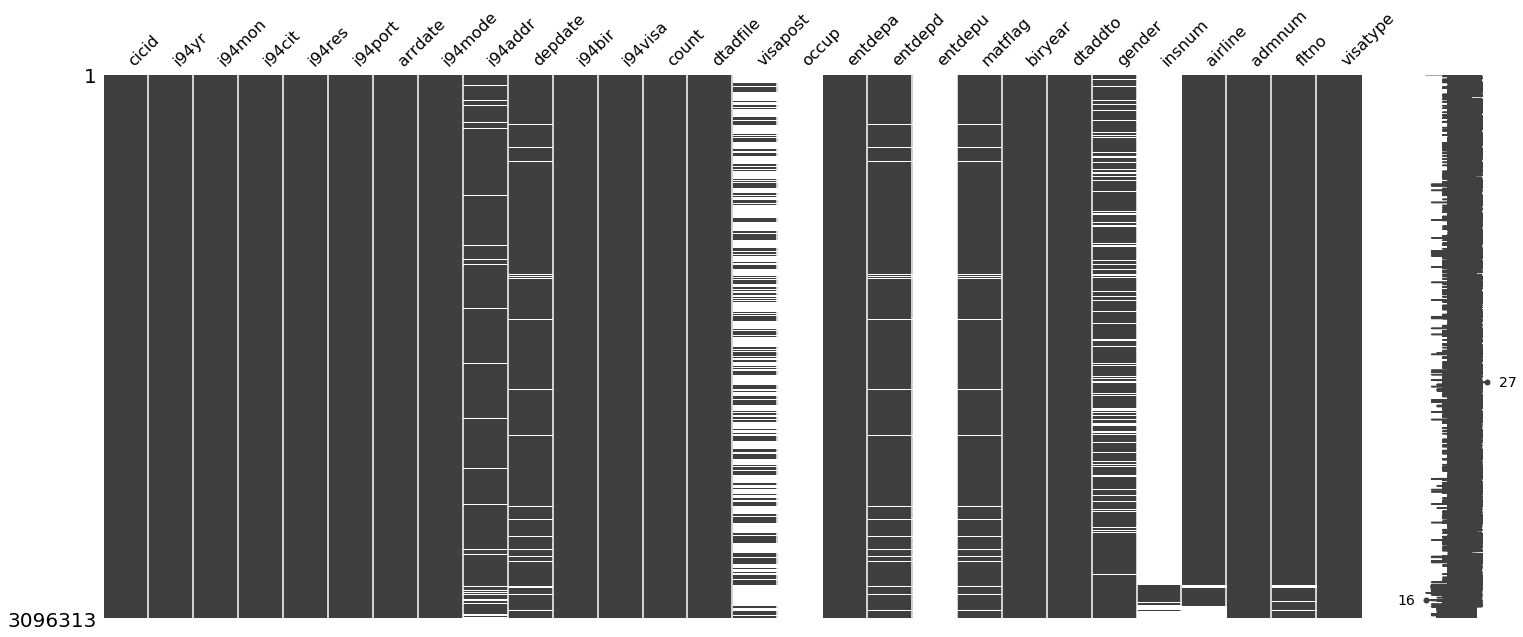

In [10]:
msno.matrix(df)

### Understanding the data

In [11]:
df[['i94mode', 'gender']].apply(pd.Series.value_counts)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,i94mode,gender
1.0,2994505.0,NaN
3.0,66660.0,NaN
2.0,26349.0,NaN
9.0,8560.0,NaN
M,NaN,1377224.0
F,NaN,1302743.0
X,NaN,1610.0
U,NaN,467.0


* Most of the people used air as mode of travel. Some people do not report their mode of transport.
* Males immigrated more than females

In [13]:
dfg = df.groupby('i94mode').agg(
{'cicid': 'count',
 'i94bir': [min, 'nunique', max], 
 'i94visa': ['count'],  
 'gender': ['count'],
 'visatype': ['nunique', 'unique']
})
# Using ravel, and a string join, we can create better names for the columns:
dfg.columns = ["_".join(x) for x in dfg.columns.ravel()]

There is -3 minimum age. Have to delete the rows.

WT - Temporary visitor for pleasure admitted without visa under the Visa Waiver Pilot Program
Check if visapost is null when visatype is WT

In [14]:
df[df.visatype =='WT'].shape

(1309059, 28)

DTADDTO - Date to which admitted to U.S. (allowed to stay until)

D/S - Duration of Stay is given to students

In [15]:
print('Total D/S Visa = {}'.format(df[df.dtaddto == 'D/S'].shape[0]))
temp = ['F1', 'F2', 'F3']
print('Total Students Visa by visatype = {}'.format(df[df.visatype.isin(temp)].shape[0]))

Total D/S Visa = 45343
Total Students Visa by visatype = 42000


### Check duplicates

###### https://stackoverflow.com/questions/33225631/find-duplicates-with-groupby-in-pandas

In [16]:
df1 = df[['cicid','gender', 'i94addr', 'visapost']]
size = df1.groupby('cicid')['gender','i94addr'].size().reset_index()
size[size[0] > 1]        # DATAFRAME OF DUPLICATES

len(size[size[0] > 1])   # NUMBER OF DUPLICATES

0

## Airport data

In [17]:
airport = pd.read_csv("airport-codes_csv.csv")

In [18]:
airport.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


### Data Dictionary

* ident -Unique identifier
* type - Type of the airport
* name - Airport Name
* elevation_ft - Altitude of the airport
* continent - Continent
* iso_country -ISO code of the country of the airport
* iso_region - ISO code for the region of the airport
* municipality - City where the airport is located
* gps_code - GPS code of the airport
* iata_code - IATA code of the airport
* local_code - Local code of the airport
* coordinates - GPS coordinates of the airport

In [19]:
print_info(airport)



---------------------
Value INFORMATION
---------------------
Shape of data set: (55075, 12) 

Column Headers: ['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country', 'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code', 'coordinates'] 

ident            object
type             object
name             object
elevation_ft    float64
continent        object
iso_country      object
iso_region       object
municipality     object
gps_code         object
iata_code        object
local_code       object
coordinates      object
dtype: object


In [20]:
print_detailed_report(airport)

Dataset INFORMATION

'ident' has 55075 unique values
~~Listing up to 10 unique values~~
['00A' '00AA' '00AK' '00AL' '00AR' '00AS' '00AZ' '00CA' '00CL' '00CN']

-----------------------------------------------------------------------

'type' has 7 unique values
['heliport' 'small_airport' 'closed' 'seaplane_base' 'balloonport'
 'medium_airport' 'large_airport']

-----------------------------------------------------------------------

'name' has 52144 unique values
~~Listing up to 10 unique values~~
['Total Rf Heliport' 'Aero B Ranch Airport' 'Lowell Field' 'Epps Airpark'
 'Newport Hospital & Clinic Heliport' 'Fulton Airport' 'Cordes Airport'
 'Goldstone /Gts/ Airport' 'Williams Ag Airport'
 'Kitchen Creek Helibase Heliport']

-----------------------------------------------------------------------

'elevation_ft' has 5450 unique values
~~Listing up to 10 unique values~~
[  11. 3435.  450.  820.  237. 1100. 3810. 3038.   87. 3350.]

---------------------------------------------------------

Most of the iata_code are missing. Almost 50% of local codes are also missing

### Global Temperature Data

In [21]:
temp_file_name = '../../data2/GlobalLandTemperaturesByCity.csv'
temp = pd.read_csv(temp_file_name)

In [22]:
temp.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


### Data Dictionary


* dt - Date in format YYYY-MM-DD
* AverageTemperature - Average temperature of the city in a given date
* City	City Name
* Country	Country Name
* Latitude	Latitude
* Longitude	Longitude


### U.S. City Demographic Data

In [23]:
dem = pd.read_csv("us-cities-demographics.csv", sep=";")

In [24]:
dem.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


### Data Dictionary


* City - Name of the city
* State - US state of the city
* Median Age - The median of the age of the population
* Male Population - Number of the male population
* Female Population - Number of the female population
* Total Population - Number of the total population
* Number of Veterans - Number of veterans living in the city
* Foreign-born - Number of residents of the city that were not born in the city
* Average Household Size - Average size of the houses in the city
* State Code - Code of the state of the city
* Race - Race class
* Count - Number of individual of each race

In [26]:
print_info(dem)



---------------------
Value INFORMATION
---------------------
Shape of data set: (2891, 12) 

Column Headers: ['City', 'State', 'Median Age', 'Male Population', 'Female Population', 'Total Population', 'Number of Veterans', 'Foreign-born', 'Average Household Size', 'State Code', 'Race', 'Count'] 

City                       object
State                      object
Median Age                float64
Male Population           float64
Female Population         float64
Total Population            int64
Number of Veterans        float64
Foreign-born              float64
Average Household Size    float64
State Code                 object
Race                       object
Count                       int64
dtype: object


In [27]:
print_detailed_report(dem)

Dataset INFORMATION

'City' has 567 unique values
~~Listing up to 10 unique values~~
['Silver Spring' 'Quincy' 'Hoover' 'Rancho Cucamonga' 'Newark' 'Peoria'
 'Avondale' 'West Covina' "O'Fallon" 'High Point']

-----------------------------------------------------------------------

'State' has 49 unique values
~~Listing up to 10 unique values~~
['Maryland' 'Massachusetts' 'Alabama' 'California' 'New Jersey' 'Illinois'
 'Arizona' 'Missouri' 'North Carolina' 'Pennsylvania']

-----------------------------------------------------------------------

'Median Age' has 180 unique values
~~Listing up to 10 unique values~~
[33.8 41.  38.5 34.5 34.6 33.1 29.1 39.8 36.  35.5]

-----------------------------------------------------------------------

'Male Population' has 594 unique values
~~Listing up to 10 unique values~~
[ 40601.  44129.  38040.  88127. 138040.  56229.  38712.  51629.  41762.
  51751.]

-----------------------------------------------------------------------

'Female Population' ha

### Not many missing values

In [28]:
dfg = dem.groupby(['State']).agg(
{'Median Age': 'median',
 'Male Population': 'sum', 
 'Female Population' : sum,
 'Total Population' : sum,
 'Number of Veterans' : sum,
 'Foreign-born': sum,
 'Average Household Size': 'mean',
 'Count': sum,
 'Race': lambda x: list(x), 
 'City': lambda x: list(x)
 
})

dfg.reset_index()

,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,Count,Race,City
0,Alabama,38.00,2448200.0,2715106.0,5163306,352896.0,252541.0,2.430000,1096154,"[Asian, White, American Indian and Alaska Nati...","[Hoover, Montgomery, Huntsville, Huntsville, B..."
1,Alaska,32.20,764725.0,728750.0,1493475,137460.0,166290.0,2.770000,336228,"[Hispanic or Latino, White, American Indian an...","[Anchorage, Anchorage, Anchorage, Anchorage, A..."
2,Arizona,34.10,11137275.0,11360435.0,22497710,1322525.0,3411565.0,2.774375,5754881,"[Black or African-American, American Indian an...","[Avondale, Mesa, Avondale, Scottsdale, Glendal..."
3,Arkansas,32.60,1400724.0,1482165.0,2882889,154390.0,307753.0,2.526897,643597,"[Hispanic or Latino, Black or African-American...","[North Little Rock, Jonesboro, Springdale, For..."
4,California,35.80,61055672.0,62388681.0,123444353,4617022.0,37059662.0,3.095325,31753718,"[Black or African-American, Asian, Hispanic or...","[Rancho Cucamonga, West Covina, Folsom, Folsom..."
5,Colorado,36.80,7273095.0,7405250.0,14678345,939480.0,1688155.0,2.560000,3587084,"[Hispanic or Latino, Hispanic or Latino, Black...","[Westminster, Lakewood, Denver, Greeley, Longm..."
6,Connecticut,35.40,2123435.0,2231661.0,4355096,122546.0,1114250.0,2.666154,1106528,"[American Indian and Alaska Native, Black or A...","[New Haven, Danbury, New Britain, Stamford, Da..."
7,Delaware,36.40,163400.0,196385.0,359785,15315.0,16680.0,2.450000,75048,"[Asian, American Indian and Alaska Native, His...","[Wilmington, Wilmington, Wilmington, Wilmingto..."
8,District of Columbia,33.80,1598525.0,1762615.0,3361140,129815.0,475585.0,2.240000,726519,"[Black or African-American, Hispanic or Latino...","[Washington, Washington, Washington, Washingto..."
9,Florida,40.20,15461937.0,16626425.0,32306132,1861951.0,7845566.0,2.760274,8664477,"[White, White, Black or African-American, Whit...","[Fort Myers, Saint Petersburg, Miami Gardens, ..."
